# Listas , Data Frame, Factor y Tablas

## Simplificar y Preservar Subconjuntos

Es importante entender las  diferencias  entre  simplificar y preservar subconjuntos. Simplificar subconjuntos devuelve la estructura de datos más simple posible que pueda representar la salida. Preservar subconjuntos  mantiene la estructura de la salida igual  que la de la  entrada, y es generalmente mejor para la programación porque el resultado será siempre del mismo tipo.

Omitir  `drop= FALSE` cuando estamos con subconjuntos de matrices y data frame  es un error de los más comunes de  programación.  Desafortunadamente, cómo cambiar entre simplificar y preservar difiere para los diferentes tipos de datos:

```
 	          Simplificar 	           Preservar
Vector          x[[1]] 	                x[1]
Lista 	      x[[1]] 	                x[1]
Factor 	     x[1:4, drop = T] 	      x[1:4]
Array 	      x[1,] o x[,1] 	        x[1, , drop=F] o x[, 1, drop=F]
Data frame 	 x[,1] o x[[1]] 	       x[, 1, drop=F] o x[1]
```

Preservar  es lo  mismo para todos los tipos de datos: se obtiene el mismo tipo de salida y de entrada.
En simplificar el comportamiento varía ligeramente entre diferentes tipos de datos, como se describe a continuación:

In [9]:
x11 <- c(a = 1, b = 2)
x11[1]
x11[[1]]

y11 <- list(a = 1, b = 2)
str(y11[1])
str(y11[[1]])


z11 <- factor(c("R", "C"))
z11[1]
z11[1, drop = TRUE]


a11 <- matrix(1:4, nrow = 2)
a11[1, , drop = FALSE]
a11[1, ]



df11 <- data.frame(a = 1:2, b = 1:2)
str(df11[1])
str(df11[[1]])
str(df11[, "a", drop = FALSE])
str(df11[, "a"])





a 
1

[1] 1

List of 1
 $ a: num 1
 num 1


[1] R
Levels: C R

[1] R
Levels: R

1,3


[1] 1 3

'data.frame':	2 obs. of  1 variable:
 $ a: int  1 2
 int [1:2] 1 2
'data.frame':	2 obs. of  1 variable:
 $ a: int  1 2
 int [1:2] 1 2


##   `$`





Este operador es una abreviación, donde `x$y ` es equivalente `x[["y", exact = FALSE]]`. A menudo es usado para acceder a variables en un data frame.

Un error común con `$` es tratar de usarlo cuando se tiene el nombre de una columna almacenada en una variable:

In [10]:
data(mtcars)
var <- "cyl"
mtcars$var  # No funciona

mtcars[[var]]



NULL

[1] 6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4

Hay una diferencia importante entre `$` y `[[`. $ hace coincidencia parcial. Como en el siguiente ejemplo. 

Para evitar este comportamiento se puede establecer  la opción global `warnPartialMatchDollar` a  TRUE. 
Usa esto con precaución por que  puede afectar el comportamiento de otro código que se ha cargado (por ejemplo, el de un paquete).

In [11]:
x <- list(abc = 1)
x$a
x[["a"]]

[1] 1

NULL

## Indices Pérdidos y fuera de límite

`[` y  `[[` difieren ligeramente en su comportamiento cuando el índice está fuera de límites `(OOB)`, por ejemplo, al intentar extraer el quinto elemento de un vector de longitud cuatro, o un subconjunto de un vector con NA o NULL.


In [12]:
x3 <- 1:4
str(x3[5])
str(x3[NA_real_])
str(x3[NULL])

 int NA
 int NA
 int(0) 


La siguiente tabla resume los resultados de subconjuntos  sobre vectores y listas con `[` y `[[` y diferentes tipos de valores OOB.

```
Operator 	Indice 	    Vector 	     Lista
[ 	         OOB 	     NA 	       list(NULL)
[ 	         NA_real_ 	NA 	       list(NULL)
[          	NULL 	    x[0] 	     list(NULL)
[[ 	        OOB 	     Error 	     Error
[[ 	        NA_real_ 	Error 	     NULL
[[ 	        NULL 	    Error 	     Error
```

## Listas 

A diferencia de un vector, en el que todos los elementos deben ser del mismo tipo, la estructura de  una lista en R puede combinar objetos de diferentes tipos. Una lista  en R es similar a un diccionario de Python o, a un hash de Perl o puede resultar similar a una estructura de  C. Las listas son muy importantes en R, formando la base para los data frames,la  programación orientada a objetos,etc.

Se puede construir listas usando ` list()`.

In [13]:
x <- list(1:3, "a", c(TRUE, FALSE, TRUE), c(2.3, 5.9))
str(x)

List of 4
 $ : int [1:3] 1 2 3
 $ : chr "a"
 $ : logi [1:3] TRUE FALSE TRUE
 $ : num [1:2] 2.3 5.9


## Operaciones con Listas

### Indexando listas

Se puede acceder a una lista de diversas maneras, por ejemplo si se quiere acceder a un elemento `c`de una lista 
llamada `lista`
```
 lista$c
 lista[["c"]]
 lista[[i]], donde i es el índice de c dentro de lista.
```

Una alternativa a la segunda y tercera técnica de listado es usar un solo corchete en lugar de dos

```
lista["c"]
lista[i],  donde i es el índice de c dentro de lista.
```

Si un único corchete es usado `[]` el resultado es otra lista, una sublista de la original.

In [14]:
lenguaje <- list(name1="Python", name2=5, name3="Interpretado")
lenguaje
lenguaje$name1
lenguaje[["name2"]]
lenguaje[[3]]

$name1
[1] "Python"

$name2
[1] 5

$name3
[1] "Interpretado"

[1] "Python"

[1] 5

[1] "Interpretado"

In [15]:
# Usando un solo corchete

lenguajes[1:2]
lenguajes1<-lenguaje[3]
lenguajes1
class(lenguajes1)
str(lenguajes1)

ERROR: Error in eval(expr, envir, enclos): objeto 'lenguajes' no encontrado


$name3
[1] "Interpretado"

[1] "list"

List of 1
 $ name3: chr "Interpretado"


Usando doble corchetes `[[ ]]`, te refieres a una sola componente, con el resultado de tener el tipo de esa componente.

In [16]:
lenguaje[[1:2]]
lenguajes2 <-  lenguaje[[2]]
lenguajes2
class(lenguajes2)

ERROR: Error in lenguaje[[1:2]]: subíndice fuera de  los límites


[1] 5

[1] "numeric"

Importante: Hay otros dos operadores de subconjuntos: `[[` y `$`. `[[` es similar a `[`, excepto que sólo puede devolver un solo valor. `$` es un atajo útil para `[[` combinado con subconjuntos de carácteres.

Es necesario el uso de `[[` cuando se trabaja con listas. Esto es porque cuando `[`se aplica a una lista  siempre devuelve una lista: nunca devuelve el  contenido de la lista. Para obtener el contenido, es necesario `[[`:

In [17]:
ar <- list(a = 1, b = 2)
ar[[1]]
ar[["a"]]

[1] 1

[1] 1

In [18]:
b2 <- list(a = list(b = list(c = list(d = 1))))
b2[[c("a", "b", "c", "d")]]

# O lo que es lo mismo

b2[["a"]][["b"]][["c"]][["d"]]

[1] 1

[1] 1

### Agregando y eliminando elementos de una lista

In [19]:
l <-list(a = "python", b= c(1,2,4), c = 13)
l
l$d <- "Milagros"  # agrego un componente
l
l[[5]]<- 20
l [6:8]<- c(TRUE, TRUE, FALSE)
l


$a
[1] "python"

$b
[1] 1 2 4

$c
[1] 13

$a
[1] "python"

$b
[1] 1 2 4

$c
[1] 13

$d
[1] "Milagros"

$a
[1] "python"

$b
[1] 1 2 4

$c
[1] 13

$d
[1] "Milagros"

[[5]]
[1] 20

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] FALSE

In [20]:
# Podemos eliminar componentes poniendo NULL a la componente

l$b <-NULL
l

$a
[1] "python"

$c
[1] 13

$d
[1] "Milagros"

[[4]]
[1] 20

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] FALSE

In [21]:
# Se puede concatenar listas

c(list("Milagros", 55000, T),list(51))

[[1]]
[1] "Milagros"

[[2]]
[1] 55000

[[3]]
[1] TRUE

[[4]]
[1] 51

In [22]:
# Se puede obtener el numero de componentes de una lista, usando length()

x
length(x)


[[1]]
[1] 1 2 3

[[2]]
[1] "a"

[[3]]
[1]  TRUE FALSE  TRUE

[[4]]
[1] 2.3 5.9

[1] 4

## Accediendo a los componentes de una lista


In [23]:
    names(lenguaje)

[1] "name1" "name2" "name3"

```
help(unlist)
```

In [24]:
# Para obtener los valores, usamos unlist()


leng <- unlist(lenguaje)
leng
class(leng)

name1          name2          name3 
      "Python"            "5" "Interpretado"

[1] "character"

In [25]:
# Por otro lado, si tuviéramos que empezar con  números, obtendríamos números.

ll <- list(a=2,b=3,c=4)
ll1 <-unlist(ll)
class(ll1)
ll1

[1] "numeric"

a b c 
2 3 4

In [26]:
# En un caso de elementos distintos 
x
x1 <-unlist(x)
class(x1)
x1

[[1]]
[1] 1 2 3

[[2]]
[1] "a"

[[3]]
[1]  TRUE FALSE  TRUE

[[4]]
[1] 2.3 5.9

[1] "character"

[1] "1"     "2"     "3"     "a"     "TRUE"  "FALSE" "TRUE"  "2.3"   "5.9"

Aunque x1 es un vector y no una lista, R da un nombre a cada elemento, podemos eliminar esos nombres usando NULL
o usando `unname()`

```
names(x1)<-NULL
x1

x2 <- unname(x1)
x2
```

## Aplicando funciones a las listas

Dos funciones son muy útiles para la aplicación de las funciones de las listas: `lapply()` y `sapply()`.  Más información sobre la familia `apply()` en [stackoverflow](http://stackoverflow.com/questions/3505701/r-grouping-functions-sapply-vs-lapply-vs-apply-vs-tapply-vs-by-vs-aggrega). 

### Usando las funciones lapply()  y sapply()

```
lapply (list, f, fargs...)}
```

- list es una lista
- f  es la función ha ser aplicada
- fargs, otros paramétros



La función `lapply()` aplica una función a elementos de una lista o un vector y devuelve los resultados en una lista. La función `lapply()`  se  vuelve muy útil cuando se trata con  data frames. En R, los data frames  se consideran una lista y las variables  son los elementos de la lista, así podemos aplicar una función a todas las variables en un data frame  usando `lapply()`.

`sapply()` aplica una función los elementos de una lista y devuelve los resultados en un vector, matriz o una lista. 


```
sapply(lista, f,...simplify)}
```

- list es una lista
- f  es la función ha ser aplicada
- simplify --> Cuando el argumento `simplify = F` entonces la función  `sapply()` devuelve los resultados en una lista como la función  `lapply()`.  Cuando  `simplify = T`, `sapply()` devuelve los resultados en una forma simplificada. Si los resultados son todos  escalares entonces `sapply()` devuelve un vector. Si los resultados son todos de la misma longitud `sapply()` entonces devolverá una matriz con una columna para cada elemento en la lista a la que se aplicó la función.

In [27]:
# help(lapply)
lapply(list(1:5, 25:29), median)
unlist(lapply(1:5, function(i) print(i) ))

[[1]]
[1] 3

[[2]]
[1] 27

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


[1] 1 2 3 4 5

In [28]:
Tiempo <-c(1,2,3,4,5,6,7)
demanda <-c(8.3, 10.4, 19.0, 17.0, 15.8, 15.3, 19.8)
BID =data.frame(Tiempo, demanda)
dl <-lapply(BID, sort)
dl
as.data.frame(dl)

$Tiempo
[1] 1 2 3 4 5 6 7

$demanda
[1]  8.3 10.4 15.3 15.8 17.0 19.0 19.8

,Tiempo,demanda
1,1,8.3
2,2,10.4
3,3,15.3
4,4,15.8
5,5,17
6,6,19
7,7,19.8


In [29]:
sapply(list(1:3, 25:29), median)
z <- function(z) return (c(z, z^2))
sapply(1:8, z)

[1]  2 27

1,2,3,4,5,6,7,8
1,4,9,16,25,36,49,64


In [30]:
# Un ejemplo más complejo

str(InsectSprays)
str(split(InsectSprays$count, InsectSprays$spray)  )
sapply(  split(InsectSprays$count, InsectSprays$spray),  mean  )

'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...
List of 6
 $ A: num [1:12] 10 7 20 14 14 12 10 23 17 20 ...
 $ B: num [1:12] 11 17 21 11 16 14 17 17 19 21 ...
 $ C: num [1:12] 0 1 7 2 3 1 2 1 3 0 ...
 $ D: num [1:12] 3 5 12 6 4 3 5 5 5 5 ...
 $ E: num [1:12] 3 5 3 5 3 6 1 1 3 2 ...
 $ F: num [1:12] 11 9 15 22 15 16 13 10 26 26 ...


A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667

## Listas recursivas

Las listas pueden ser recursivas, lo que significa que  puede tener listas dentro de otras listas. Lo que hace diferente 
de los vectores.

In [31]:
x <- list(list(list(list())))
str(x)
is.recursive(x)

List of 1
 $ :List of 1
  ..$ :List of 1
  .. ..$ : list()


[1] TRUE

`c()` combinará varias listas en una sola. Si se da una combinación de vectores y listas, `c()`  usará la coaccionará  los vectores a las listas antes de combinarlos. Comparamos  los resultados de `list()` y `c()`:

In [32]:
x <- list(list(1, 2), c(3, 4))
y <- c(list(1, 2), c(3, 4))
str(x)
typeof(x)
is.list(x)

List of 2
 $ :List of 2
  ..$ : num 1
  ..$ : num 2
 $ : num [1:2] 3 4


[1] "list"

[1] TRUE

In [33]:
str(y)
typeof(y)

List of 4
 $ : num 1
 $ : num 2
 $ : num 3
 $ : num 4


[1] "list"

Las listas son usadas para construir estructura de datos más complicadas en R. Por ejemplo `data.frames` y los objetos de modelos lineales(`lm()`) son listas:

In [34]:
is.list(mtcars)
mod <- lm(mpg ~ wt, data = mtcars)
is.list(mod)

[1] TRUE

[1] TRUE

## Atributos

Todos los objetos pueden tener atributos adicionales arbitrarios, que se utilizan para almacenar metadatos sobre el objeto. Los atributos pueden ser considerados como una lista con nombre (con nombres únicos). Los atributos se pueden acceder individualmente con `attr()` o todos a la vez (como una lista) con los `attributes()`.


In [35]:
y <- 1:9
attr(y, "un_atributo") <- "Es un vector"
attr(y, "un_atributo")
str(attributes(y))

m <- "Milagros"
attr(m, "un atributo") <- "Ella es bella"
attr(m, "un atributo")
str(attributes(m))

[1] "Es un vector"

List of 1
 $ un_atributo: chr "Es un vector"


[1] "Ella es bella"

List of 1
 $ un atributo: chr "Ella es bella"


La función `structure()` retorna un nuevo objeto, con atributos modificados:

In [36]:
#help(structure)
structure(1:10, my_attribute = "Esto es un vector")

[1]  1  2  3  4  5  6  7  8  9 10
attr(,"my_attribute")
[1] "Esto es un vector"

Por defecto muchos atributos están pérdidos cuando modificamos el  vector:


In [37]:
attributes(y[1])
attributes(sum(y))

NULL

NULL

Los únicos atributos no perdidos son los tres más importantes:

- Names, un vector de caracteres dando a cada elemento  un nombre.
- Dimension, utilizado para convertir vectores en matrices y arrays.
- Class, usado para implementar el sistema S3.

Cada uno de estos atributos tiene una función específica de acceso para obtener y establecer los valores. Al trabajar con estos atributos, usa `names(x)`, `dim(x)`, y  `class(x)`, no `attr (x, "name")`, `attr (x, "dim")`, y `attr (x, "class")`.

### Names

Se puede nombrar un vector de tres manera

- Cuando lo creas `x <- c(a = 1, b = 2, c = 3)`
- Modificando un vector en su lugar `x <- 1:3; names(x) <- c("R", "C", "G") `.
- Creando una copia modificada de un vector `x <- setNames(1:3, c("R", "C", "G"))`.



No todos los elementos de un vector necesitan  tener un nombre. Si algún nombre falta, `name()` devolverá una cadena vacía para esos elementos. Si todos los nombres están pérdidos, `name()` devolverá NULL.

In [38]:
y <- c(a = 1, 2, 3)
names(y)

z <- c(1, 2, 3)
names(z)

[1] "a" ""  ""

NULL

Puedes crear un nuevo vector sin nombres utilizando `unname(x)`, o eliminar los nombres en su lugar con  `names(x) <- NULL`.

## Data Frame 

Un data frame  es la forma más común de almacenamiento de datos en R, y si se utiliza sistemáticamente hace que el análisis de datos sea más fácil como explica el artículo [datos ordenadados de Hadley Wickman](http://vita.had.co.nz/papers/tidy-data.pdf).

Los data frame  son  una lista de vectores de la misma longitud, esto hace que sea una estructura de dos dimensiones, por lo que comparte propiedades tanto de las matrices y las listas. Esto significa que una data frames  tenga las funciones `names()`, `colnames()` y `rownames()`, aunque los `names()` y `colnames()` son la misma cosa. La `length()` de una data frame  es la longitud de la lista subyacente y así es el mismo valor  que produce `ncol()`; `nrow()` da el número de filas.

Como se describe en subconjuntos, se puede tener un subconjunto  de un data frame como una estructura de una dimensión (donde se comporta como una lista), o una estructura de dos dimensiones (donde se comporta como una matriz).

Se puede crear un data frame usando `data.frame()`, de la siguiente manera

In [39]:
help(data.frame)

data.frame {base},R Documentation
...,these arguments are of either the form value or tag = value. Component names are created based on the tag (if present) or the deparsed argument itself.
row.names,"NULL or a single integer or character string specifying a column to be used as row names, or a character or integer vector giving the row names for the data frame."
check.rows,if TRUE then the rows are checked for consistency of length and names.
check.names,logical. If TRUE then the names of the variables in the data frame are checked to ensure that they are syntactically valid variable names and are not duplicated. If necessary they are adjusted (by make.names) so that they are.
stringsAsFactors,"logical: should character vectors be converted to factors? The ‘factory-fresh’ default is TRUE, but this can be changed by setting options(stringsAsFactors = FALSE)."


In [40]:
df <- data.frame(x = 1:3, y = c("Python", "R", "C"))
str(df)

'data.frame':	3 obs. of  2 variables:
 $ x: int  1 2 3
 $ y: Factor w/ 3 levels "C","Python","R": 2 3 1


Observación: El  comportamiento predeterminado de `data.frame()`  convierte cadenas en factores. 

Usamos `stringAsFactors = FALSE` para suprimir ese comportamiento:

In [41]:
df <- data.frame(
  x = 1:3,
  y = c("Python", "R", "C"),
  stringsAsFactors = FALSE)
str(df)

'data.frame':	3 obs. of  2 variables:
 $ x: int  1 2 3
 $ y: chr  "Python" "R" "C"


### Prueba y coección 

Debido a que un `data.frame` es una clase S3, su tipo refleja el vector subyacente utilizado para su construcción: **la lista**. Para comprobar si un objeto es un data.frame, usamos `class()` o una  prueba explícita con `is.data.frame()`:

In [42]:
typeof(df)
class(df)
is.data.frame(df)

[1] "list"

[1] "data.frame"

[1] TRUE

Puedes coaccionar un objeto a un data frame con `as.data.frame()`:

1. Un vector creará un data frame  de una sola columna.

2. Una lista creará una columna para cada elemento; es un error si todos no  son de la misma longitud.

3. Una matriz creará un data frame  con el mismo número de columnas y filas que la matriz.

### Combinando data frames

Podemos utilizar las funciones `cbind()` y `rbind()`: 

```
help(cbind)
help(rbind)
```

In [43]:
# Un ejemplo del uso de cbind() y rbind()

cbind(df, data.frame(z = 3:1))
rbind(df, data.frame(x = 10, y = "z"))

,x,y,z
1,1,Python,3
2,2,R,2
3,3,C,1


,x,y
1,1,Python
2,2,R
3,3,C
4,10,z


Cuando se combinan por columnas, el número de filas debe coincidir, pero los nombres de la fila son ignorados. Al combinar por filas , tanto el número y los nombres de columnas deben coincidir. 


Utiliza `plyr::rbind.fill()` para combinar data frames que no tienen las mismas columnas. Para conocer más acerca del paquete **plyr**, revisar el artículo de  Sean C. Anderson [plyr: Split-Apply-Combine for Mortals](http://seananderson.ca/2013/12/01/plyr.html).

Es un error común para tratar de crear un data frame  con `cbind()`. Esto no funciona porque `cbind()` creará una matriz a menos que uno de los argumentos ya sea un data frame. En su lugar debemos utilizar `data.frame()` directamente:

In [44]:
mala <- data.frame(cbind(a = 1:2, b = c("a", "b")))
str(mala)
good <- data.frame(a = 1:2, b = c("a", "b"),
  stringsAsFactors = FALSE)
str(good)

'data.frame':	2 obs. of  2 variables:
 $ a: Factor w/ 2 levels "1","2": 1 2
 $ b: Factor w/ 2 levels "a","b": 1 2
'data.frame':	2 obs. of  2 variables:
 $ a: int  1 2
 $ b: chr  "a" "b"


### Particularidades de las columnas

Puesto que un data frame es una lista de vectores, es posible para un data frame  tener una columna que es una lista:

In [45]:
df <- data.frame(x = 1:3)
df$y <- list(1:2, 1:3, 1:4)
df

,x,y
1,1,"1, 2"
2,2,"1, 2, 3"
3,3,"1, 2, 3, 4"


Sin embargo, cuando una lista se da a  `data.frame()`, se trata de poner cada elemento de la lista en su propia columna, por lo que esto falla:

In [46]:
data.frame(x = 1:3, y = list(1:2, 1:3, 1:4))

ERROR: Error in data.frame(1:2, 1:3, 1:4, check.names = FALSE, stringsAsFactors = TRUE): arguments imply differing number of rows: 2, 3, 4


Una solución es utilizar `I()`, lo que provoca que `data.frame()` trate una lista como una unidad:

In [47]:
dfl <- data.frame(x = 1:3, y = I(list(1:2, 1:3, 1:4)))
str(dfl)
dfl[2, "y"]

'data.frame':	3 obs. of  2 variables:
 $ x: int  1 2 3
 $ y:List of 3
  ..$ : int  1 2
  ..$ : int  1 2 3
  ..$ : int  1 2 3 4
  ..- attr(*, "class")= chr "AsIs"


[[1]]
[1] 1 2 3


Del mismo modo, también es posible tener una columna de un data frame  que es una matriz o un array , siempre y cuando el número de filas coincide con el data frame:

In [48]:
dfm <- data.frame(x = 1:3, y = I(matrix(1:9, nrow = 3)))
str(dfm)
dfm[2, "y"]

'data.frame':	3 obs. of  2 variables:
 $ x: int  1 2 3
 $ y: 'AsIs' int [1:3, 1:3] 1 2 3 4 5 6 7 8 9


     [,1] [,2] [,3]
[1,]    2    5    8

Utilice la lista y columnas de matrices con precaución: muchas funciones que trabajan con data frame, suponen que todas las columnas son vectores.

## Subconjuntos de Data Frame

Los data frames  poseen las características de  listas y matrices: si tienes un subconjunto con un solo vector, se comportan como una  lista; si el subconjunto tiene  dos vectores, se comporta como  una matriz.

In [49]:
df <- data.frame(x = 1:3, y = 3:1, z = letters[1:3])

df[df$x == 2, ]
df[c(1,3),]

# Hay dos maneras de seleccionar columnas desde un data frame
# como una lista
df[c("x", "z")] 

#como una matriz
df[, c("x", "z")]

# Diferencias de seleccionar una unica columna
str(df["x"])
str(df[, "x"])

,x,y,z
2,2,2,b


,x,y,z
1,1,3,a
3,3,1,c


,x,z
1,1,a
2,2,b
3,3,c


,x,z
1,1,a
2,2,b
3,3,c


'data.frame':	3 obs. of  1 variable:
 $ x: int  1 2 3
 int [1:3] 1 2 3


In [50]:
df <- data.frame(a = 1:2, b = 1:2)
str(df[1])
str(df[[1]])
str(df[, "a", drop = FALSE])
str(df[, "a"])

'data.frame':	2 obs. of  1 variable:
 $ a: int  1 2
 int [1:2] 1 2
'data.frame':	2 obs. of  1 variable:
 $ a: int  1 2
 int [1:2] 1 2


In [51]:
# Subconjuntos de data frame es útil en la  modificacion 
# condicional de vectores

df1 <- data.frame(a = c(1, 10, NA))
df1$a[df1$a < 5] <- 0
df1$a

[1]  0 10 NA

 Fijese en las dos declaraciones mtcars permanecerán como un data frame.  En el segundo, mtcars se convertirá en una lista.
```
mtcars[] <- lapply(mtcars, as.integer)

mtcars <- lapply(mtcars, as.integer)
```

## Enlazando y Mezclando

Si  tienes una tabla de búsqueda más complicada que tiene varias columnas de información y  tenemos un vector de grados enteros, y una tabla que describe sus propiedades.

Si queremos duplicar la tabla de información de modo que tenemos una fila para cada valor en `grados`, podemos hacerlo de dos maneras, ya sea usando `match()` y subconjuntos  de entero o `rownames()` y subconjuntos de caracteres:

```
help(match)
```

In [52]:

grados <- c(1, 2, 2, 3, 1)

info <- data.frame(
  grados = 3:1,
  desc = c("Excelente", "Bueno", "Pobre"),
  f = c(F, F, T)
)
grados
id <- match(grados, info$grados)
info[id, ]
rownames(info) <- info$grados
info[as.character(grados), ]

[1] 1 2 2 3 1

,grados,desc,f
3,1,Pobre,TRUE
2,2,Bueno,FALSE
2.1,2,Bueno,FALSE
1,3,Excelente,FALSE
3.1,1,Pobre,TRUE


,grados,desc,f
1,1,Pobre,TRUE
2,2,Bueno,FALSE
2.1,2,Bueno,FALSE
3,3,Excelente,FALSE
1.1,1,Pobre,TRUE


Si tiene varias columnas que enlazar, tendrás que contraerlos primero en una sola columna (con `interaction ()`, `paste()`, o `plyr::id()`). También se puede utilizar  `merge()` o `plyr::join()`, que hace lo mismo.

## Muestras aleatorias/Boostrap

Se pueden  utilizar índices enteros para realizar un muestreo aleatorio o bootstrapping de un data frame  o de un vector. `sample()` genera un vector de índices, entonces usamos subconjuntos para acceder a los valores:

In [53]:
#help(sample)
#help(set.seed)

dfr <- data.frame(x = rep(1:3, each = 2), y = 6:1, z = letters[1:6])
set.seed(10)

# Reordenar de forma aleatoria
dfr[sample(nrow(dfr)), ]

# Seleccionamos al azar 3 filas
dfr[sample(nrow(dfr), 3), ]

# Seleccionamos 6 replicaciones boostrap
dfr[sample(nrow(dfr), 6, rep = T), ]

,x,y,z
4,2,3,d
2,1,5,b
5,3,2,e
3,2,4,c
1,1,6,a
6,3,1,f


,x,y,z
2,1,5,b
6,3,1,f
3,2,4,c


,x,y,z
3,2,4,c
4,2,3,d
4.1,2,3,d
1,1,6,a
4.2,2,3,d
3.1,2,4,c


Los argumentos de  `sample()` controlan el número de muestras a extraer, y si el muestreo se realiza con o sin reemplazo.

## Eliminando columnas de un Data Frame 

Existen varias formas de eliminar una columna de un data frame. Poniendo la columna de forma individual a NULL.

In [54]:
dfr <- data.frame(x = 1:3, y = 3:1, z = letters[1:3])
dfr
dfr$z <- NULL
dfr

,x,y,z
1,1,3,a
2,2,2,b
3,3,1,c


,x,y
1,1,3
2,2,2
3,3,1


In [55]:
# Puedes retornar las columnas que tu desees

dfzz <- data.frame(x = 1:3, y = 3:1, z = letters[1:3])
dfzz
dfzz[c("x", "y")]

,x,y,z
1,1,3,a
2,2,2,b
3,3,1,c


,x,y
1,1,3
2,2,2
3,3,1


In [56]:
#Si conoces a las columnas que no deseas, utilica operaciones de conjuntos para averiguar qué columnas  mantener:

dfzz[setdiff(names(dfzz), "z")]

,x,y
1,1,3
2,2,2
3,3,1


## Seleccionando una fila sobre una condición

Porque  permite combinar fácilmente las condiciones de varias columnas, esta es probablemente la técnica más utilizada para la extracción de las filas de un data frame.

```
mtcars[mtcars$gear == 5, ]

mtcars[mtcars$gear == 5 & mtcars$cyl == 4, ]
```

`subset()` es una función  especializada para subconjuntos de data frames, como se ve en el siguiente ejemplo, que hace lo mismo que el código anterior.

In [57]:
#help(subset)
subset(mtcars, gear == 5)
subset(mtcars, gear == 5 & cyl == 4)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Porsche 914-2,26,4,120.3,91,4.43,2.14,16.7,0,1,5,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351,264,4.22,3.17,14.5,0,1,5,4
Ferrari Dino,19.7,6,145,175,3.62,2.77,15.5,0,1,5,6
Maserati Bora,15,8,301,335,3.54,3.57,14.6,0,1,5,8


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Porsche 914-2,26,4,120.3,91,4.43,2.14,16.7,0,1,5,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2


# Un ejemplo

In [58]:
# Leamos un archivo de datos
examen <- read.table("Examen.txt",header=TRUE )
class(examen)
head(examen)

# Realicemos operaciones con este data frame

examen[2:5,]
examen[2:5,2]
class(examen[2:5,2])
examen[2:5,2,drop=FALSE]
class(examen[2:5,2,drop=FALSE])

#Filtrado

examen[examen$quiz.prom >= 2.8,]
subset(examen, examen$quiz.prom < 1.5)


# Creemos una columnas a partir de otras
ex1<-examen$tarea.prom -examen$quiz.prom
ex <- cbind(examen,ex1 )
class(ex)
head(ex)


# Aplicando apply

apply(examen, 1, max)

[1] "data.frame"

,final.exam,quiz.prom,tarea.prom
1,2,4,4
2,1.7,2.7,4
3,1.3,3.3,4
4,3.3,3.3,4
5,0,3.3,4
6,3,3.7,4


,final.exam,quiz.prom,tarea.prom
2,1.7,2.7,4
3,1.3,3.3,4
4,3.3,3.3,4
5,0,3.3,4


[1] 2.7 3.3 3.3 3.3

[1] "numeric"

,quiz.prom
2,2.7
3,3.3
4,3.3
5,3.3


[1] "data.frame"

,final.exam,quiz.prom,tarea.prom
1,2,4,4
3,1.3,3.3,4
4,3.3,3.3,4
5,0,3.3,4
6,3,3.7,4
7,1.3,3.3,3.7
8,1,3.7,4
9,0,3.3,4
11,4.3,4,4
12,3.7,4,4


,final.exam,quiz.prom,tarea.prom
17,0,1,3.7


[1] "data.frame"

,final.exam,quiz.prom,tarea.prom,ex1
1,2,4,4,0
2,1.7,2.7,4,1.3
3,1.3,3.3,4,0.7
4,3.3,3.3,4,0.7
5,0,3.3,4,0.7
6,3,3.7,4,0.3


[1] 4.0 4.0 4.0 4.0 4.0 4.0 3.7 4.0 4.0 3.3 4.3 4.0 4.0 4.0 4.3 4.0 3.7 4.0 4.0
[20] 4.3 4.0 4.0 4.0 4.0 4.0 4.0 4.0 4.3 4.0 4.3 4.0 4.0 4.0

## Usando la función merge()

```
help(merge)
```
[Rankings de Lenguajes de Programación 2015](http://www.tiobe.com/index.php/content/paperinfo/tpci/index.html)


In [59]:

lenguajesP <- c("Java","C", "C++", "Python", "JS", "Ruby", "R")
puestoR <- c(1, 2,3, 5, 7, 12, 19)
dataF <- data.frame(lenguajesP,puestoR,stringsAsFactors=FALSE)
dataF

lenguajesQ <- c("C#","Perl", "Assembly", "Switf", "Matlab", "SQL", "Cobol")
#lenguajesP <- c("Java","C", "C++", "Python", "JS", "Ruby", "R")
puestoR1<- c(4, 9, 10, 12, 19, 20, 22)
dataG <- data.frame(lenguajesP,puestoR1,stringsAsFactors=FALSE)
dataG

merge(dataF, dataG)

,lenguajesP,puestoR
1,Java,1
2,C,2
3,C++,3
4,Python,5
5,JS,7
6,Ruby,12
7,R,19


,lenguajesP,puestoR1
1,Java,4
2,C,9
3,C++,10
4,Python,12
5,JS,19
6,Ruby,20
7,R,22


,lenguajesP,puestoR,puestoR1
1,C,2,9
2,C++,3,10
3,Java,1,4
4,JS,7,19
5,Python,5,12
6,R,19,22
7,Ruby,12,20


## Aplicando funciones a data frames

### Usando lapply() y sapply() en data frames

In [60]:
dataI <-lapply(dataF, sort)
dataI
as.data.frame(dataI)

$lenguajesP
[1] "C"      "C++"    "Java"   "JS"     "Python" "R"      "Ruby"  

$puestoR
[1]  1  2  3  5  7 12 19

,lenguajesP,puestoR
1,C,1
2,C++,2
3,Java,3
4,JS,5
5,Python,7
6,R,12
7,Ruby,19


[1] "Day" "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov"
[13] "Dec"

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
211.0 210.0 256.0 225.0 226.0 207.5 188.0 145.0 168.0 201.0 131.5 100.0

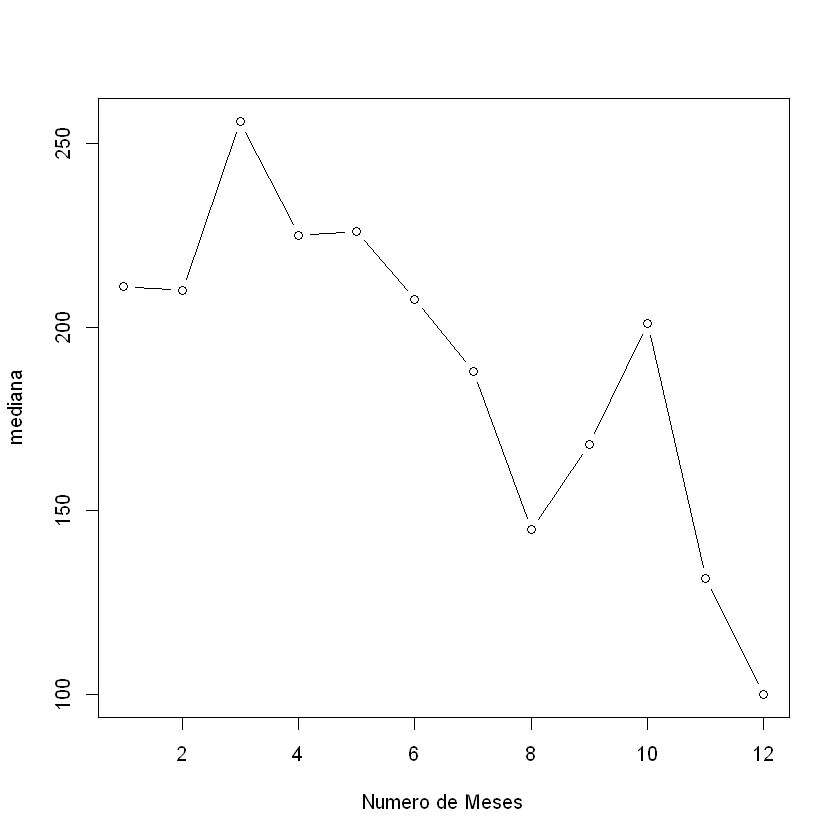

In [61]:
# Ejemplo con Sapply

pnums <- read.table("loteria.txt", header=TRUE)
names(pnums)

meses <- pnums[2:13]
sapply(meses, median, na.rm = TRUE)
mediana <-sapply(meses, median, na.rm=TRUE)
plot(mediana, type="b", xlab="Numero de Meses")

## Factors

Un uso importante de los  atributos es definir factores. Un factor es un vector que contiene sólo  valores predefinidos, y se utiliza para almacenar datos categóricos. Los factores  se construyen en la parte superior de los vectores enteros utilizando dos atributos: `class()`, "factor", que hace que se comportan de manera diferente que  vectores  y `levels()`, que define el conjunto de valores permitidos.

In [62]:
help(factor)

factor {base},R Documentation
x,"a vector of data, usually taking a small number of distinct values."
levels,"an optional vector of the values (as character strings) that x might have taken. The default is the unique set of values taken by as.character(x), sorted into increasing order of x. Note that this set can be specified as smaller than sort(unique(x))."
labels,"either an optional character vector of labels for the levels (in the same order as levels after removing those in exclude), or a character string of length 1."
exclude,"a vector of values to be excluded when forming the set of levels. This should be of the same type as x, and will be coerced if necessary."
ordered,logical flag to determine if the levels should be regarded as ordered (in the order given).
nmax,an upper bound on the number of levels; see ‘Details’.
...,"(in ordered(.)): any of the above, apart from ordered itself."
ifany,"(only add an NA level if it is used, i.e. if any(is.na(x))."


In [63]:
x <- factor(c("Mili", "Cesar", "Cesar", "Mili"))
x
class(x)
levels(x)

# No puede utilizar l valores que no están en los niveles
x[2] <- "Python"
x

c(factor("Mili"), factor("Cesar"))

[1] Mili  Cesar Cesar Mili 
Levels: Cesar Mili

[1] "factor"

[1] "Cesar" "Mili"

Warning message:
In `[<-.factor`(`*tmp*`, 2, value = "Python"): invalid factor level, NA generated

[1] Mili  <NA>  Cesar Mili 
Levels: Cesar Mili

[1] 1 1

Los factores son útiles cuando se conocen los valores posibles que  una variable puede tomar, incluso si  no se ven todos los valores en un determinado conjunto de datos. El uso de un factor en lugar de un vector de caracteres hace obvio cuando algunos grupos no contienen observaciones:

In [64]:
Leng <- c("C", "Python", "R")
Parad <- factor(Leng, levels = c("C", "I", "F"))

table(Leng)
table(Parad)

Leng
     C Python      R 
     1      1      1 

Parad
C I F 
1 0 0 

In [65]:
# Ejemplos del uso de factor

h <- c(3,4, 6, 4)
h1 <- factor(h)
h1
str(h1)
unclass(h1)
levels(h1)


[1] 3 4 6 4
Levels: 3 4 6

 Factor w/ 3 levels "3","4","6": 1 2 3 2


[1] 1 2 3 2
attr(,"levels")
[1] "3" "4" "6"

[1] "3" "4" "6"

Del ejemplo, anterior, lo importante es `(1, 2,3,2)`  que muestra  que nuestros datos consisten de   un valor de nivel-1, a continuación, de un valor de  nivel-2 y valor  de nivel-3, y, finalmente, otro valor de nivel-2. 
Los datos han sido registrados por niveles. Los niveles propios se registran también, aunque como caracteres  como puede ser "5" en lugar de 5.

La longitud de un factor todavía se define en términos de la longitud de la data más que por ejemplo, un conteo del número de niveles:


In [66]:
length(h1)

[1] 4

In [67]:
# Podemos anticipar nuevos niveles:

h2  <- c(5,12,13,12)
h3 <- factor(h2,levels=c(5,12,13,88))
h3
h3[2] <- 88
h3

[1] 5  12 13 12
Levels: 5 12 13 88

[1] 5  88 13 12
Levels: 5 12 13 88

In [68]:
# No puedes colarte en un nivel ilegal.

h3[2] <- 28

Warning message:
In `[<-.factor`(`*tmp*`, 2, value = 28): invalid factor level, NA generated

## Funciones usadas con factores

`help(tapply)`

La función `tapply(x, f, g)`, tiene un vector `x`, un factor `f` o una lista de factores  y `g` una función La operación llevada por  `tapply()` es dividir un vector `x`, en grupos, cada grupo correspondiente al nivel del factor `f` 
(o a una combinación de niveles de los factores en el caso de múltiples factores) y  aplicarle  la función `g` a los subvectores resultantes de `x` .

Cada factor en `f` debe tener la misma longitud que `x`. Si un componente de `f` es un vector debe ser pasado a factor
aplicando `as.factor()`. Veamos unos ejemplos



In [69]:
# Un vector
xt <- 1:20  
xt
length(xt)

# Un factor de la misma longitud, definiendo grupos
yt <- factor(rep(letters[1:5], each = 4))  
yt
length(yt)

# Sumemos  los valores de x en cada subgrupo definido por y
tapply(xt, yt, sum)  

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

[1] 20

[1] a a a a b b b b c c c c d d d d e e e e
Levels: a b c d e

[1] 20

a  b  c  d  e 
10 26 42 58 74

In [70]:
# Un pequeño ejemplo

edad<- c(25,26,55,37,21,42)
af<- c("R", "D","D", "R", "U", "D")
tapply(edad,af, mean)

D  R  U 
41 31 21

La función `tapply()` trata al vector `("R", "D","D", "R", "U", "D")` como un factor con niveles `"R" ,"D", "U"`, debes notar que  que `"D"` ocurre en los índices `2, 3 y 6`; `"R"` ocurre en los índices `1` y `4`; y `"U"` ocurre en el índice `5`. 
Por conveniencia eso se refiere a tres vectores indexados `(2,3,6)`, `(1,4)`,`(5)`, como x, y, z respectivamente. entonces  `tapply()` calcula la media de `mean(u[x]), mean(u[y])` y `mean(u[z])` y retorna esas medias en tres elementos de un vector.

In [71]:
# Un ejemplo mas

str(InsectSprays)
str(  split(InsectSprays$count, InsectSprays$spray)  )
tapply( InsectSprays$count, InsectSprays$spray,  mean )

'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...
List of 6
 $ A: num [1:12] 10 7 20 14 14 12 10 23 17 20 ...
 $ B: num [1:12] 11 17 21 11 16 14 17 17 19 21 ...
 $ C: num [1:12] 0 1 7 2 3 1 2 1 3 0 ...
 $ D: num [1:12] 3 5 12 6 4 3 5 5 5 5 ...
 $ E: num [1:12] 3 5 3 5 3 6 1 1 3 2 ...
 $ F: num [1:12] 11 9 15 22 15 16 13 10 26 26 ...


A         B         C         D         E         F 
14.500000 15.333333  2.083333  4.916667  3.500000 16.666667

```
help(split)
```

La forma básica de `split()` es `split(x,f)` donde `x` es un factor o un data frame y `f` es un factor o una lista de factores. La acción es dividir  `x` en grupos los cuales son retornados como una lista.

In [72]:
library(datasets)
head(airquality)
s <- split(airquality, airquality$Month)
s
class(s)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


ERROR: Error in vapply(seq_along(mapped), function(i) {: Los valores deben ser de longitud 1, 
pero el resultado FUN(X [[1]]) es la longitud 0 


,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9
10,NA,194,8.6,69,5,10


[1] "list"

In [73]:
# Un ejemplo de factores con mas de un nivel
o <- rnorm(10)

# Creamos un factor con dos niveles
ff1 <- gl(2, 5) 

# Creamos un factor con 5 niveles

ff2 <- gl(5, 2)  

str(ff1)
str(ff2)

# Calculamos un factor con 10 niveles

interaction(ff1, ff2)

# Automaticamente llama a interaction(ff1, ff2)

str(split(o, list(ff1, ff2))) 

# Quitamos los niveles vacios

str(split(o, list(ff1, ff2), drop = TRUE))

 Factor w/ 2 levels "1","2": 1 1 1 1 1 2 2 2 2 2
 Factor w/ 5 levels "1","2","3","4",..: 1 1 2 2 3 3 4 4 5 5


[1] 1.1 1.1 1.2 1.2 1.3 2.3 2.4 2.4 2.5 2.5
Levels: 1.1 2.1 1.2 2.2 1.3 2.3 1.4 2.4 1.5 2.5

List of 10
 $ 1.1: num [1:2] -0.179 -0.631
 $ 2.1: num(0) 
 $ 1.2: num [1:2] 0.979 0.293
 $ 2.2: num(0) 
 $ 1.3: num -0.37
 $ 2.3: num 0.544
 $ 1.4: num(0) 
 $ 2.4: num [1:2] -0.708 -0.369
 $ 1.5: num(0) 
 $ 2.5: num [1:2] -1.32 1.28
List of 6
 $ 1.1: num [1:2] -0.179 -0.631
 $ 1.2: num [1:2] 0.979 0.293
 $ 1.3: num -0.37
 $ 2.3: num 0.544
 $ 2.4: num [1:2] -0.708 -0.369
 $ 2.5: num [1:2] -1.32 1.28


A veces, cuando un data frame se lee directamente desde un archivo, una columna que deberia  producir un vector numérico produce en cambio un factor. Esto es causado por un valor no numérico en la columna, a menudo un valor perdido codificado de una manera especial como `.` o `-`.
Para remediar la situación, se usa la coerción  en el vector desde un factor a un vector de caracteres, y luego de un caracter   a un vector double. (Debes  comprobar si hay valores perdidos después de este proceso).
Por supuesto, un mejor  plan  es descubrir qué causó el problema en primer lugar y arreglarlo y para ello se puede  utilizar  el argumento `na.strings` de `read.csv()` para empezar.

In [74]:
zz1 <- read.csv(text = "valores\n12\n1\n.\n9")
zz1
typeof(zz1$valores)
as.double(zz1$valores)
class(zz1$valores)
as.double(as.character(zz1$valores))



,valores
1,12
2,1
3,.
4,9


[1] "integer"

[1] 3 2 1 4

[1] "factor"

Warning message:
In eval(expr, envir, enclos): NAs introducidos por coerción

[1] 12  1 NA  9

In [75]:
zz2 <- read.csv(text = "valores\n12\n1\n.\n9", na.strings=".")
typeof(zz2$valores)
class(zz2$valores)
zz2$valores

[1] "integer"

[1] "integer"

[1] 12  1 NA  9

Desafortunadamente, la mayoría de las funciones  de carga de  datos en R convierten automáticamente vectores de caracteres a factores. Esto no es óptimo, porque no hay manera de que esas funciones sepan el conjunto de todos los niveles posibles o su orden óptimo.

En su lugar, utilice los `stringsAsFactors = FALSE`  para suprimir ese comportamiento, y luego convertir manualmente los vectores de caracteres a factores utilizando su conocimiento de los datos. Una opción global, `options (stringsAsFactors = FALSe)`, está disponible para controlar este comportamiento, pero no es recomendable. Cambiar una opción global puede tener consecuencias inesperadas cuando se combina con otro código (ya sea en  paquetes, o de otro tipo) y las  opciones globales hacen del código algo  más difícil de entender, ya que aumentan el número de líneas que se necesita leer para entender cómo una sola línea de código se comportará.

Mientras que los factores se ven (y, a menudo se comportan) como vectores de caracteres, en realidad son números enteros. Tenga cuidado al tratarlos como cadenas. Algunos métodos de cadena (como `gsub()` y `grepl()`)  coaccionan factores a cadenas, mientras que otros (como `nchar()`) lanzarán un error, y otros (como `c())` utilizará los valores enteros subyacentes. 

Por esta razón, es mejor  convertir explícitamente los factores a  vectores de caracteres si necesitas un comportamiento similar a una cadena. 

## Trabajando con Tablas

In [76]:
# Empecemos con un ejemplo

uu <- c(22,8,33,6,8,29,-2)
fl <- list(c(5,12,13,12,13,5,13),c("m","ce","m","m","ce","m","m"))
tapply(uu,fl,length)

,ce,m
5,NA,2
12,1,1
13,1,2


El resultado anterior produce un resultado NA. En estadística, se dice que es una **Tabla de contingencia**. La función `table()` resuelve el problema de las tablas de contingencia.

`help(table)`

In [77]:
table(fl)

    fl.2
fl.1 ce m
  5   0 2
  12  1 1
  13  1 2

El primer argumento en una llamada a `table()` es o bien un factor o una lista de factores. Los dos factores  aquí fueron  `(5,12,13,12,13,5,13)` y ("m", "ce", "m", "m", "ce", "m", "m") . En este caso, un objeto que es interpretado como un factor se cuenta como uno.

In [78]:
# Trabajando con data frames

vot <- read.table("votacion.dat",header=T)
vot

# Usemos table() para calcular la tabla de contingencia para estos datos

vot1 <- table(vot)
vot1

,Vote.por..X,Vote.por..X.la.ultima.vez
1,Si,Si
2,Si,No
3,No,No
4,No estoy seguro,Si
5,No,No


                 Vote.por..X.la.ultima.vez
Vote.por..X       No Si
  No               2  0
  No estoy seguro  0  1
  Si               1  1

### Operaciones sobre Tablas

Operaciones que pueden ser usadas por los data frame, pueden ser usadas por las tablas.

In [79]:
class(vot1)

vot1[1,1]

vot1[1,]

vot1/5

apply(vot1, 1, sum)

addmargins(vot1)

dimnames(vot1)

[1] "table"

[1] 2

No Si 
 2  0

                 Vote.por..X.la.ultima.vez
Vote.por..X        No  Si
  No              0.4 0.0
  No estoy seguro 0.0 0.2
  Si              0.2 0.2

No No estoy seguro              Si 
              2               1               2

,No,Si,Sum
No,2,0,2
No estoy seguro,0,1,1
Si,1,1,2
Sum,3,2,5


$Vote.por..X
[1] "No"              "No estoy seguro" "Si"             

$Vote.por..X.la.ultima.vez
[1] "No" "Si"

## Ejemplo: Media muestral y el Teorema del Límite Central

El data frame `randu` contiene 400 triples de  sucesivos números aleatorios que se generan  usando un algoritmo llamado **RANDU**.[Aquí más información del RANDU pseudo-random number generator](https://en.wikipedia.org/wiki/RANDU).
En este ejemplo se investiga la distribución de la media muestral de esos  números.

In [80]:
data(randu)

# Matriz de varianza-covarianza para las tres variables

var(randu)

,x,y,z
x,0.081231885,-0.004057683,0.004637656
y,-0.004057683,0.086270206,-0.005148432
z,0.004637656,-0.005148432,0.077860433


In [81]:
# La diagonal de la matriz varianza y covarianza 
# tiene tres varianzas de muestra cual deben ser cercanas a 0.0833
# bajo la aseveracion que RANDU genera data uniform(0,1)

diag(var(randu))

x          y          z 
0.08123189 0.08627021 0.07786043

In [82]:
# La correlacion es cercana a cero

cor(randu)

,x,y,z
x,1.00000000,-0.04847127,0.05831454
y,-0.04847127,1.00000000,-0.06281830
z,0.05831454,-0.06281830,1.00000000


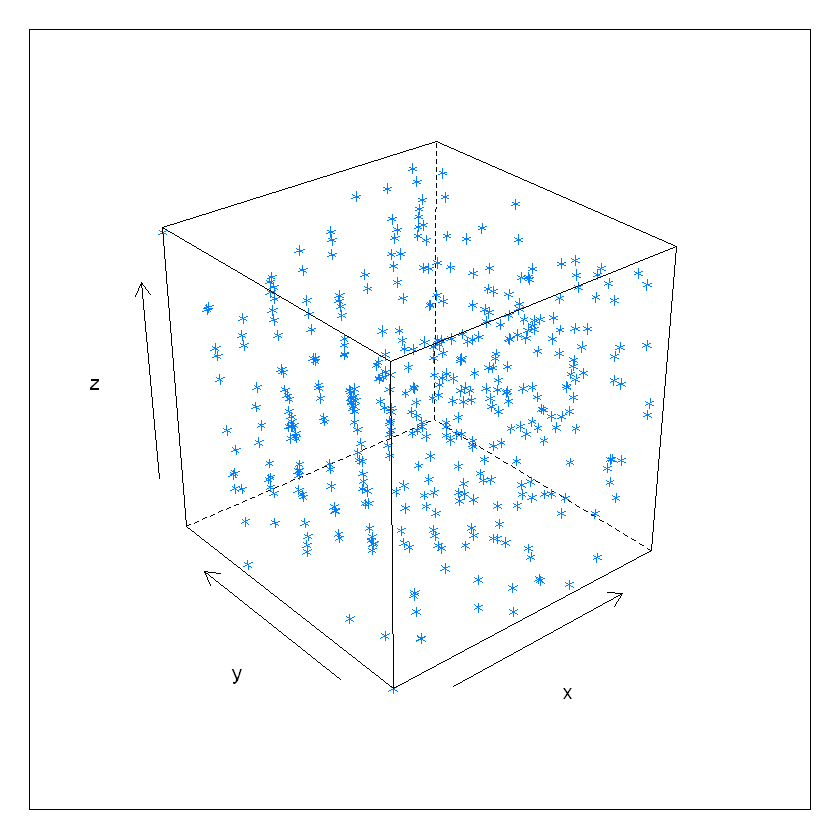

In [83]:
# Instalamos el paquete lattice: install.package("lattice)
# Veamos el diseño que se observa en la data

library(lattice)
cloud(z ~ x + y, data=randu)

In [84]:
# Veamos la distribución de las filas. Cada fila es asumida como una muestra aleatoria
# de tamaño 3 de una distribución Uniforme (0,1) para obtener el vector de mili

mili <- apply(randu, MARGIN=1, FUN=mean)

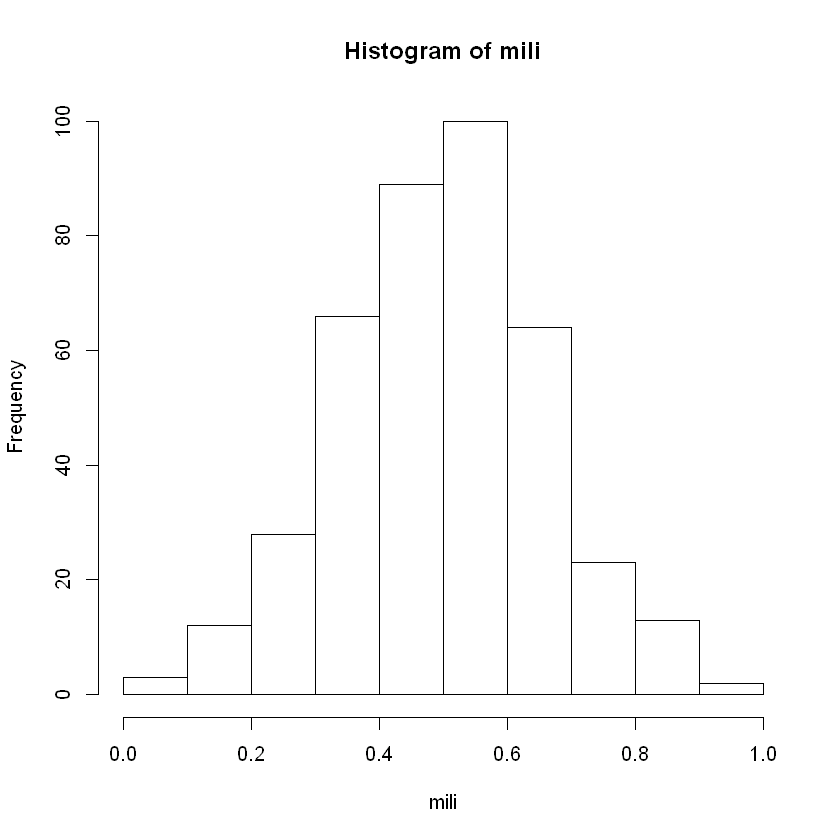

In [85]:
hist(mili)

De acuerdo con el teorema del límite central, la distribución de la media de la muestra tiende a la normal cuando  el tamaño de la muestra tiende a infinito. Para comparar nuestro histograma con una distribución normal, necesitamos un histograma de probabilidad. Hagamos eso con el siguiente código: `hist(mili, prob=TRUE)`.

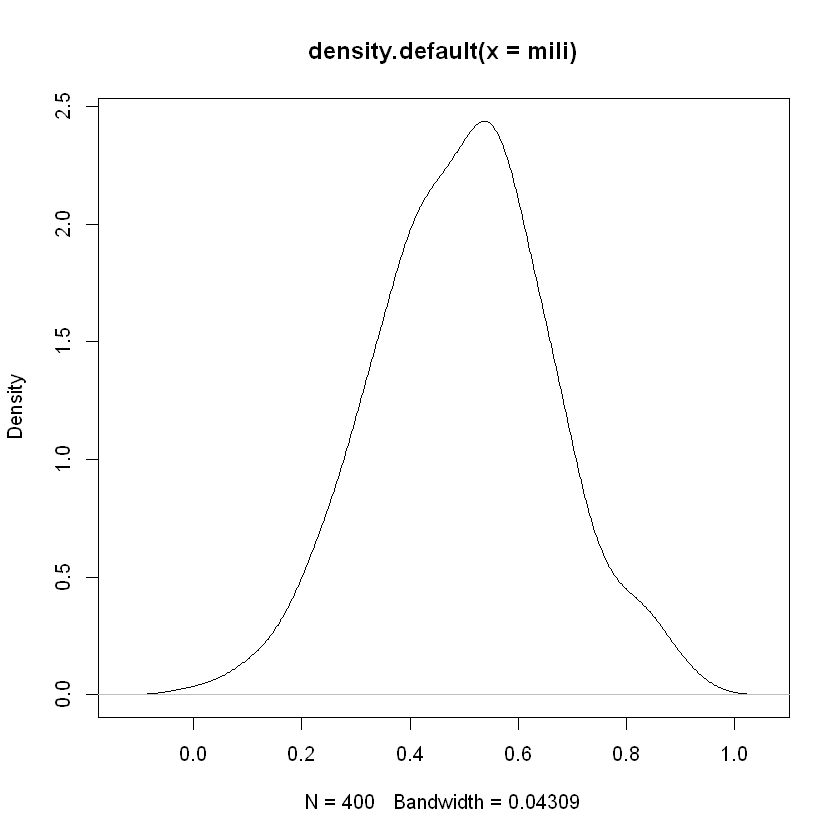

In [86]:
# La densidad estimada puede ser mostrada como

plot(density(mili))

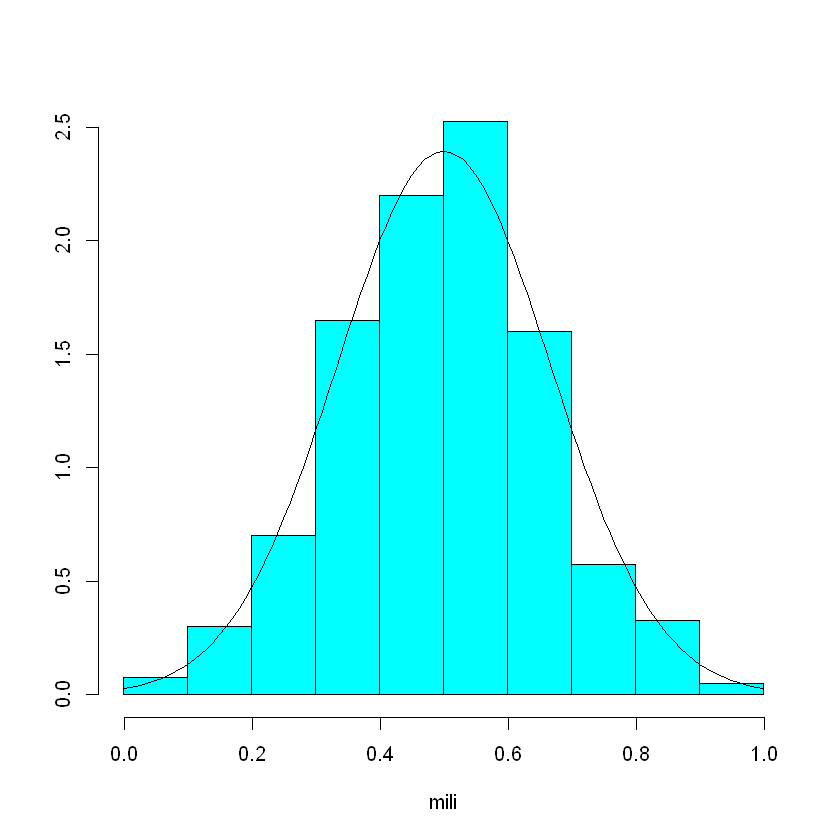

In [87]:
# Usemos la funcion truehist del package MASS para mostrar un histograma de probabilidad.
library(MASS)
truehist(mili)
curve(dnorm(x, 1/2, sd=sqrt(1/36)), add=TRUE)

A partir del histograma y la densidad normal mostrada  se puede observar que la distribución de la muestra se aproxima a la normal incluso con una muestra tan pequeña.